<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_colwidth', 70)

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [212]:
dfraw = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';', header=0,
                    engine="python")

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [213]:
dfraw.head(2)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к переезду , не готов...","частичная занятость, проектная работа, полная занятость","гибкий график, полный день, сменный график, вахтовый метод, удален...",Опыт работы 16 лет 10 месяцев Август 2010 — по настоящее время 8 ...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийская государственная а...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким командировкам","частичная занятость, проектная работа, полная занятость","гибкий график, полный день, сменный график, удаленная работа",Опыт работы 19 лет 5 месяцев Январь 2000 — по настоящее время 19 ...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая академия им. А.Ф. Можа...,12.04.2019 08:42,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [214]:
dfraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [215]:
dfraw.isnull().sum()

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [216]:
dfraw.describe(include='all')

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к командировкам",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по настоящее время 1 г...,Индивидуальное предпринимательство / частная практика / фриланс,Системный администратор,Высшее образование 1987 Военный инженерный Краснознаменный институ...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


In [217]:
df = dfraw.copy()

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [218]:
# # df.query('Образование.str.contains("Среднее")').count()
# df['Образование'].value_counts()
df['Образование'] = df['Образование и ВУЗ'].str.split(
    pat='(\d\d\d\d)', expand=True)[0]
df['Образование'].value_counts(dropna=False).index
df['Образование'] = df['Образование'].str.strip()

In [219]:
df['Образование'].unique()

array(['Неоконченное высшее образование', 'Высшее образование',
       'Среднее специальное образование', 'Высшее образование (Бакалавр)',
       'Высшее образование (Магистр)',
       'Высшее образование (Кандидат наук)', 'Среднее образование',
       'Высшее образование (Доктор наук)'], dtype=object)

In [220]:
df['Образование'] = df['Образование'].str.strip().apply(lambda x:
                                                        'Высшее образование' if x in ['Высшее образование (Бакалавр)',
                                                                                      'Высшее образование (Магистр)',
                                                                                      'Высшее образование (Кандидат наук)',
                                                                                      'Высшее образование (Доктор наук)'] else x)

In [221]:
df['Образование'].value_counts(dropna=False)

Высшее образование                 33863
Среднее специальное образование     5765
Неоконченное высшее образование     4557
Среднее образование                  559
Name: Образование, dtype: int64

In [222]:
# df.drop('Образование и ВУЗ', axis=1, inplace=True)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [223]:
agesexsplit = df['Пол, возраст'].str.split(
    pat='(\d\d)', expand=True).loc[:, :1]
df['пол'] = agesexsplit.loc[:, 0].str.replace(",", "")
df['Возраст'] = agesexsplit.loc[:, 1].astype(float)

In [224]:
round(df['Возраст'].median(), 0)

31.0

In [225]:
df.drop('Пол, возраст', axis=1, inplace=True)

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [226]:
df['Опыт работы'] = df['Опыт работы'].str.replace(
    'Опыт работы ', '')  # Извлекаем данные о стаже в годах и месяцах
# Извлекаем данные о стаже в годах без месяцев
df['Лет'] = df['Опыт работы'].str.extract(pat='(\d{1,2}\s)')
df['Лет'] = pd.to_numeric(df['Лет'], errors='coerce')

In [227]:
df['Лет'].isna().sum()

170

In [228]:
df['Мес'] = df['Опыт работы'].str.extract(
    pat='(\w+\s\d\d*)')  # извлекаем месяц
# обнуляем позиции не содержащие месяцы. используем формы слова "год" и "лет"
df['Мес'] = np.where(df['Мес'].str.contains(
    'год|года|лета|лет'), df['Мес'], None)
# в качестве разделителя
df['Мес'] = df['Мес'].str.extract(pat='(\s\d+)').fillna(0).astype(int)
df['Мес'].dtypes

dtype('int32')

In [229]:
df['Всего Мес'] = (df['Мес']+12*df['Лет'])  # Преобразум год и месяцы

In [230]:
df['Всего Мес'].median()

102.0

In [231]:
# df.drop('Опыт работы', axis=1, inplace=True)

Если мы заменим отсутструющие значения нулями, получим

In [236]:
(df['Мес'].fillna(0)+12*df['Лет'].fillna(0)).median()

101.0

При замене медианами, получаем

In [237]:
df['Всего Мес'].apply(lambda x: df['Всего Мес'].median()
                      if np.isnan(x) else x).median()

102.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [238]:
# Задаём список особых городов (города миллионники и Москва с Санкт-Петербургом)
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск',
                  'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']
capitals = ["Москва", "Санкт-Петербург"]

# Заменяем слово готова на готов, извлекаем название гоорода и чистим его
df['Город, переезд, командировки'] = df['Город, переезд, командировки'].str.replace(
    'готова', 'готов')
df['Город'] = df['Город, переезд, командировки'].str.extract(
    pat='(\w*\w.\w*\w.\w*)')
df['Город'] = df['Город'].str.strip()

# Снижаем размерность переменной город
conditions = [df['Город'].isin(million_cities), df['Город'].isin(capitals)]
choices = ['Город-миллионник', df['Город']]
df['Город'] = np.select(conditions, choices, 'другое')
(df['Город'].value_counts(normalize=True)*100).round()

Москва              37.00
другое              35.00
Город-миллионник    16.00
Санкт-Петербург     11.00
Name: Город, dtype: float64

In [239]:
# выделяем признак готовность к переезду
df['переезд'] = df['Город, переезд, командировки'].str.extract(
    pat='(w*\w*\s*\готов к переезду|хочу переехать)', expand=True)
df['переезд'] = df['переезд'].str.lstrip()
transfer_conditions = (df['переезд'] == 'хочу переехать',
                       df['переезд'] == 'готов к переезду',
                       df['переезд'] == 'не готов к переезду')
choices = [True, True, False]
df['переезд'] = (np.select(transfer_conditions, choices)).astype('bool')
(df['переезд'].value_counts(normalize=True)*100).round(0)

False    64.00
True     36.00
Name: переезд, dtype: float64

In [240]:
# создаём на параметр готовности к командировкам
a = ['не готов к командировкам', 'готов к командировкам',
     'готов к редким командировкам']
b = ['b_trips1', 'b_trips2', 'b_trips3']
df['командировки'] = df['Город, переезд, командировки'].str.replace(a[0],
                                                                    b[0]).str.replace(a[1],
                                                                                      b[1]).str.replace(a[2],
                                                                                                        b[2])
df['командировки'] = df['командировки'].str.extract(
    pat="(b_trips\d)").replace(dict(zip(b, a)))
df['командировки'].fillna('не готов к командировкам', inplace=True)
df['командировки'] = np.where(
    df['командировки'] == 'не готов к командировкам', False, True)
(df['командировки'].value_counts(normalize=True)*100).round(0)

True     71.00
False    29.00
Name: командировки, dtype: float64

In [241]:
round(
    100*df.query('командировки==True' and 'переезд==True').shape[0]/df.shape[0], 1)

35.8

In [242]:
round(100*df[(df['командировки'] == True) &
      (df['переезд'] == True)].shape[0]/df.shape[0], 0)

32.0

In [243]:
df.drop('Город, переезд, командировки', axis=1, inplace=True)

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [244]:
occupation = df['Занятость'].str.get_dummies(sep=', ').replace(
    {1: True, 0: False})  # Преобразуем в бинарные признаки
wsched = df['График'].str.get_dummies(sep=', ').replace({1: True, 0: False})

In [245]:
df[(occupation['проектная работа'] == True) & (
    occupation['волонтерство'] == True)].shape[0]

436

In [246]:
df[(wsched['вахтовый метод'] == True) & (
    wsched['гибкий график'] == True)].shape[0]

2311

In [247]:
df.drop(['График', 'Занятость'], axis=1, inplace=True)

In [248]:
df = pd.concat([df, occupation, wsched], axis=1)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [249]:
# разбиваем запись на зарплату и единицу номинирования
salary = df['ЗП'].str.split(" ", expand=True).rename(
    columns={0: 'Value', 1: 'Currency'})
salary.Currency.replace(['бел.руб.', 'грн.', 'сум'],                                  # заменяем обозначения валют для соответствия ExchangeRates.csv
                        ['BYN', 'UAH', 'UZS'],
                        inplace=True)
salary['date'] = pd.to_datetime(df['Обновление резюме']).dt.date
salary.Value = salary.Value.astype(int)

In [250]:
currency = pd.read_csv('ExchangeRates.csv', sep=',', usecols=[
                       'date', 'currency', 'close', 'proportion'])  # Считываем необходимые нам колонки
currency['date'] = pd.to_datetime(currency['date']).dt.date
currency['exrate'] = currency['close']/currency['proportion']
currency.drop(['close', 'proportion'], axis=1, inplace=True)
currency = currency.pivot(index='date', columns='currency')['exrate'].reset_index(
)                       # Преобразуем датафрейм в сводную таблицу

In [251]:
# создаём серию зарплат с выполнением конверсии в рубли
for i in range(salary.shape[0]):
    # опрос столбцов даты и вида валюты
    saldate, currtype = salary.date.iloc[i], salary.Currency.iloc[i]
    if currtype == 'руб.':
        continue
    else:
        salary.Value.iloc[i] = salary.Value.iloc[i]*(currency[currency.date == saldate].   # вывод зарплаты пересчитанной по курсу на дату обновления вакансии
                                                     get(currtype).values[0])
df['ЗП'] = salary.Value

C:\Users\User\AppData\Local\Temp\ipykernel_14500\692913742.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary.Value.iloc[i]=salary.Value.iloc[i]*(currency[currency.date==saldate].   # вывод зарплаты пересчитанной по курсу на дату обновления вакансии


In [252]:
df['Обновление резюме'] = pd.to_datetime(
    salary['date']).dt.normalize()  # Преобразование даты

In [253]:
df.dtypes

ЗП                                        float64
Ищет работу на должность:                  object
Опыт работы                                object
Последнее/нынешнее место работы            object
Последняя/нынешняя должность               object
Образование и ВУЗ                          object
Обновление резюме                  datetime64[ns]
Авто                                       object
Образование                                object
пол                                        object
Возраст                                   float64
Лет                                       float64
Мес                                         int32
Всего Мес                                 float64
Город                                      object
переезд                                      bool
командировки                                 bool
волонтерство                                 bool
полная занятость                             bool
проектная работа                             bool


In [205]:
df['ЗП'] = pd.to_numeric(df['ЗП'])
df['ЗП'].median()

60000.0

In [210]:
df['Возраст'].mode()

0    30.00
Name: Возраст, dtype: float64

In [256]:
df['Всего Мес'].max()

1188.0

In [257]:
df[df['ЗП'] > 1E6].shape[0]

5

In [258]:
df.groupby('Образование')['ЗП'].median().idxmax()

'Высшее образование'

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Построим гистограмму распределения и коробчатую диаграмму признака возраст. 
Для поиска выбросов будем использовать метод Тьюки. Медианное значение возраста отмечено зелёным цветом, среднее - жёлтым и модальное - красным

In [259]:
def histobox(dataframe, feature,  title, dfmin, dfmax, tickmark):
    x = dataframe[feature]
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))
    dfmin = dataframe[feature].min()
    dfmax = dataframe[feature].max()
    histplot = sns.histplot(data=dataframe, x=feature, ax=axes[0], kde=True)
    histplot.axvline(x.mean(), color='y', lw=5)
    histplot.axvline(x.mode()[0], color='r', lw=5)
    histplot.axvline(x.median(), color='g', lw=5)
    histplot.set_title(title)
    axes[0].set_xticks(np.arange(dfmin, dfmax, tickmark))
    boxplot = sns.boxplot(data=dataframe, x=feature, ax=axes[1])
    axes[1].set_xticks(np.arange(dfmin, dfmax, tickmark))
    boxplot.set_title(title)
    axes[0].set(ylabel='Количество')
    fig.subplots_adjust(hspace=0.3)

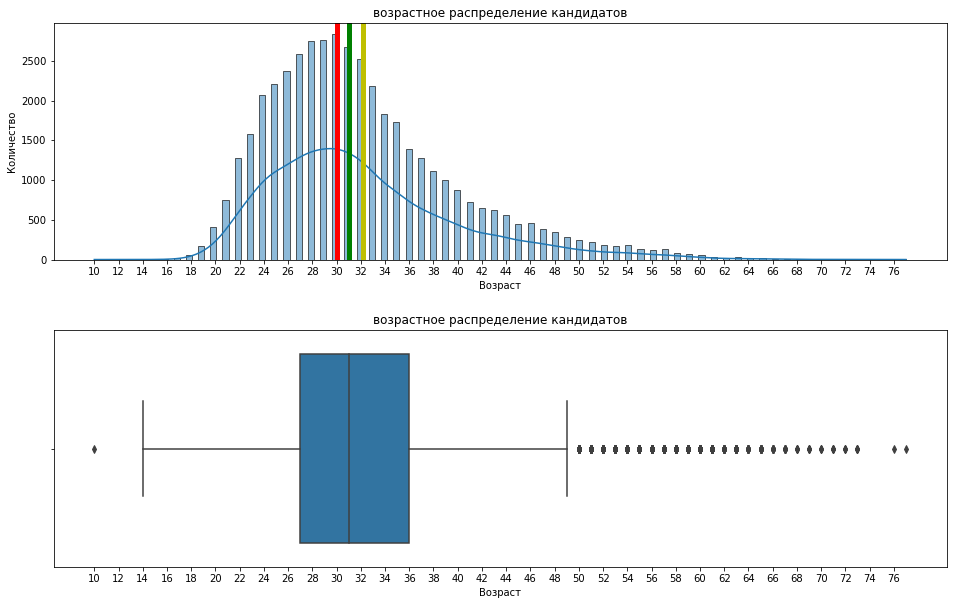

In [260]:
a = histobox(df, 'Возраст', 'возрастное распределение кандидатов', 0, 80, 2)

In [261]:
df['Возраст'].describe()

count    44744.00
mean        32.19
std          7.92
min         10.00
25%         27.00
50%         31.00
75%         36.00
max         77.00
Name: Возраст, dtype: float64

По своему виду, распределение напоминает гамма-распределение, имеются "аномальные" значения как справа, так и слева, справа их ожидаемо больше. Среднее значение возраста: 32 года, медианное: 31 год. Большинство значений укладываются в диапазон
14-49 лет. При этом мы видим что минимальный возраст кандидатов составляет 10 лет. Согласно действующему законодательству РФ трудоустройство детей и подростков младше 14 лет допускается только в "кинематографии, театрах, театральных и концертных организациях, цирках" либо при проведении спортивных соревнований (ТК РФ, гл. 11. ст. 63. пар. 4 : "Возраст, с которого допускается заключение трудового договора".

Таким образом данные по всем кандидатам младше 14 лет вызывают подозрения с точки зрения корректности данных. 
Посмотрим на эти записи, но преварительно введём параметр 'starting_age'- возраст начала трудовой деятельности, который будем использовать для проверки всех позиций на корректное соотношение возраста и трудового стажа. Разумеется здесь мы имеем очень грубое упрощение реальной ситуации не учитывающее возможные периоды безработицы или неоформления соискателя, но данный параметр является своеобразной "нулевой линией" для оценки полного периода трудовой деятельности.


In [262]:
# df.drop('starting_age', axis=1, inplace=True)

In [263]:
df.insert(10, 'starting_age', df['Возраст']-df['Всего Мес']/12)
df.shape[0]

44744

Посмотрим как распределён данный параметр на гистограмме, увеличим интервал на который приходится основное количество 
корректных данных

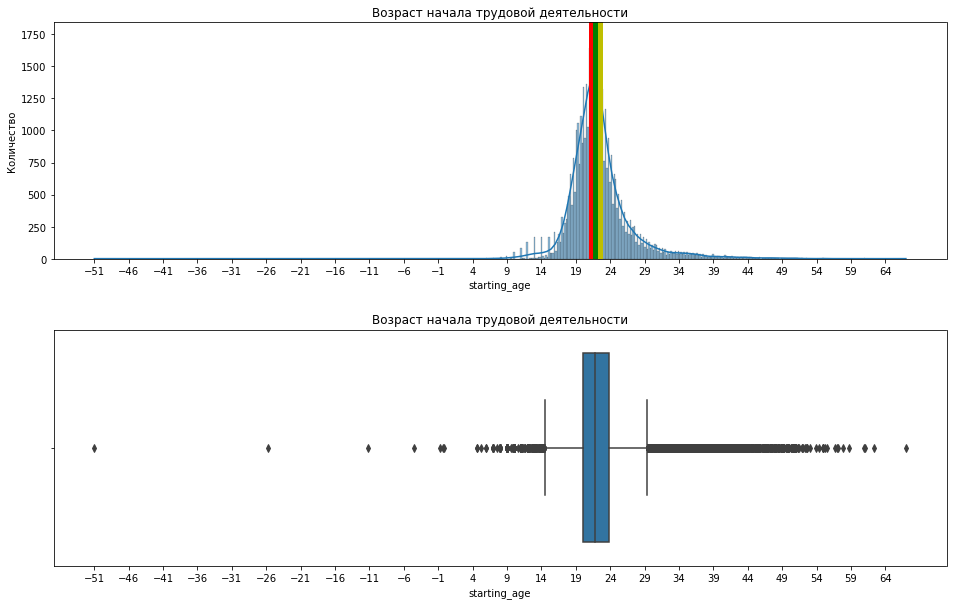

In [264]:
histobox(df, 'starting_age', 'Возраст начала трудовой деятельности', -10, 50, 5)

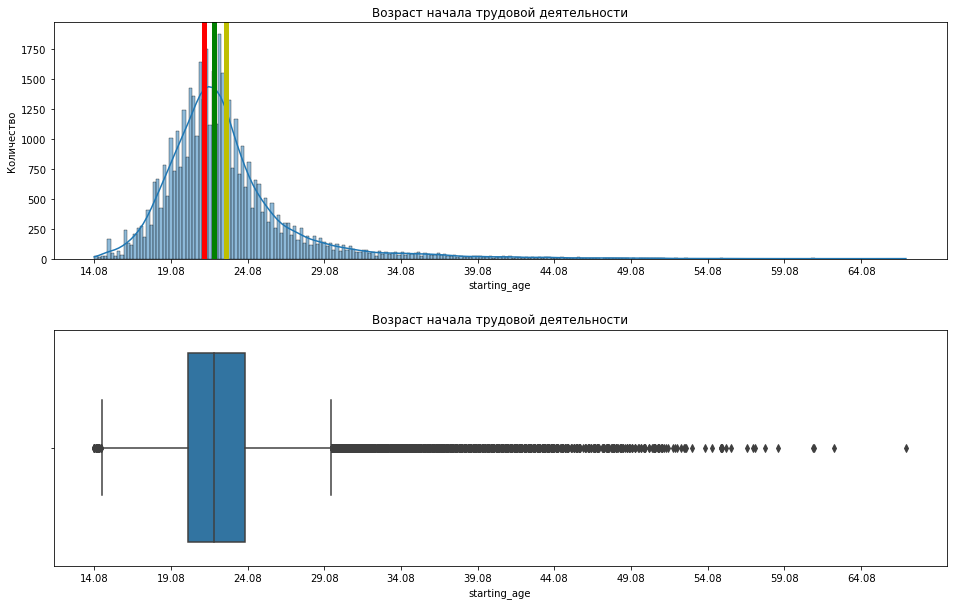

In [265]:
histobox(df.query('starting_age<40' and 'starting_age>14'),
         'starting_age', 'Возраст начала трудовой деятельности', 14, 40, 5)

Мы видим выбросы с обеих сторон, однако если выбросы слева априори представляют собой некорректные данные, 
то выбросы справа свидетельствуют скорее о длительных периодах безработности и/или работе без официального оформления. 
Интересно, что мода располагается в районе 21.25 лет, что близко к возрасту окончания института (многие студенты уже вышли на подготовку к дипломному проекту и параллельно нашли первую работу или подработку).


In [266]:
df['starting_age'].describe()

count    44574.00
mean        22.47
std          4.52
min        -51.00
25%         20.08
50%         21.83
75%         23.83
max         67.00
Name: starting_age, dtype: float64

In [268]:
df['starting_age'].mode()

0    21.25
Name: starting_age, dtype: float64

Посмотрим, есть ли у нас соискатели, утверждающие что они были официально трудоустроены до достижения 14-ти летнего возраста и построим гистограмму распределения начального возраста для тех у кого он не превышает 14 лет, а также определим количество соискателей у которых возраст начала работы превышает 30 лет.

In [269]:
early_starters14 = df.query('starting_age<14')
early_starters14.shape[0]

546

Итого, судя по данным датафрейма у нас 546 соискателей начали работать ранее 14 лет и были официально оформлены, 
что сомнительно поскольку, официально трудоустроиться до этого возраста могут только дети-спортсмены и дети-актёры. При этом, у нас есть записи где возраст начала имеет значение менее 10 лет и даже отрицательное. Эту группу необходимо очистить от заведомо нереалистичных записей и дополнительно исследовать. По всей видимости, большинство этих соискателей трудятся в отрасли IT либо сфере развлечений и в свой стаж включают фриланс либо работу без оформления.

In [270]:
late_starters30 = df.query('starting_age>30')
late_starters30.shape[0]

2427

Группа с возрастом трудоустройства после 30 лет также требует исследования. Здесь мы имеем дело либо с безработицей, работой без официального оформления, самозанятостью в качесчтве ИП или какими-то обстоятельствами личного или семейного характера. Также возможно что соискатели указали в анкете только стаж релевантный деятельности на выполнение которой они претендуют. В любом случае мы имеем здесь дело с "серой зоной", и мало что знаем о соискателе который большую часть своей профессиональной жизни нигде не был оформлен официально. Не исключено что анализ этих данных вместе с остальными данными сета может увеличить погрешность моделирования, к примеру, занизить значение прогнозируемой зарплаты ввиду меньшего опыта при большем возрасте или готовности к демпингу. Либо наоборот, не исключено и завышение требований по зарплате при официальном трудоустройстве(ввиду наличия стабильного объёма заказов, выполняемых частным образом).

Оценим долю выбросных данных в датасете

In [271]:
(early_starters14.shape[0]+late_starters30.shape[0])/df.shape[0]*100

6.644466297157161

Данные составляют 6.7% от данных датасета, и их радикальное удаление может исказить датасет. 
Проверим отличаются ли медианнные запрашиваемые зарплаты этих сетов и для остальной части выборки

In [272]:
late_starters30['ЗП'].median()

50000.0

In [273]:
early_starters14['ЗП'].median()

30265.7

In [274]:
df.query('14<starting_age<30')['ЗП'].median()

60000.0

Итак, медианы разные, причём у "рано начавших" дедианное значение самое низкое. Посмотрим теперь на модальные значнения

In [275]:
late_starters30['ЗП'].mode()

0    50000.00
Name: ЗП, dtype: float64

In [276]:
early_starters14['ЗП'].mode()

0    30000.00
Name: ЗП, dtype: float64

In [277]:
df.query('14<starting_age<30')['ЗП'].mode()

0    50000.00
Name: ЗП, dtype: float64

Модальные зарплаты совпадают у основного количества соискателей и у "поздно начавших", "рано начавшие" по прежнему модально
претендуют на зарплату в 30 тыс рублей. В завершении посмотри на медианные возрасты групп. 

In [278]:
late_starters30['Возраст'].median()

46.0

In [279]:
early_starters14['Возраст'].median()

21.0

In [280]:
df.query('14<starting_age<30')['Возраст'].median()

30.0

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

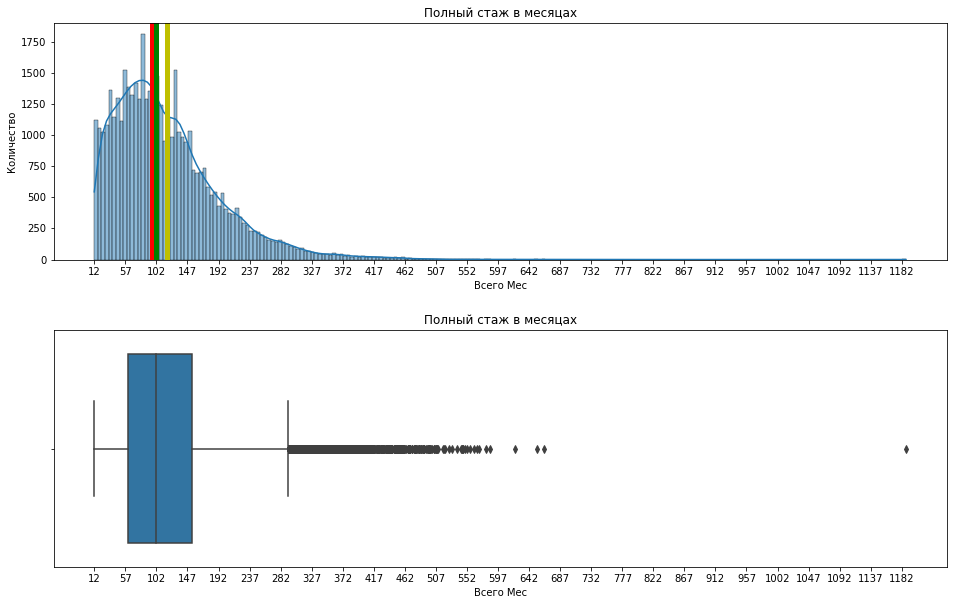

In [281]:
histobox(df, 'Всего Мес', 'Полный стаж в месяцах', -20, 1200, 45)

In [282]:
df['Всего Мес'].describe()

count    44574.00
mean       116.97
std         76.98
min         12.00
25%         61.00
50%        102.00
75%        154.00
max       1188.00
Name: Всего Мес, dtype: float64

In [283]:
df['Всего Мес'].mode()

0    96.00
Name: Всего Мес, dtype: float64

Распределение стажа по форме близко к логнормальному распределению с очень тяжёлым правым хвостом. Первый квартиль составляет 60 мес., среднее 116 мес., 3 квартиль- 154 мес., модальное значение 96 мес.  Минимальное значение стажа 0 мес, максимальное-1188 месяцев (99 лет), последнее значение явно абсурдное. Большинство наблюдений укладываются в диапазон 0...300 месяцев. Рассмотрим распределение в диапазоне 300+ месяцев.

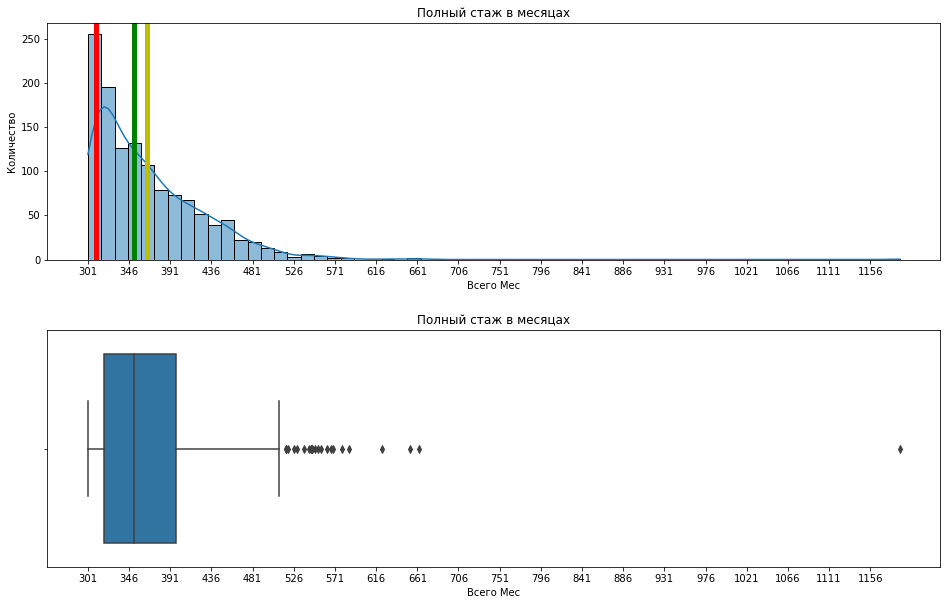

In [284]:
histobox(df[df['Всего Мес'] > 300], 'Всего Мес',
         'Полный стаж в месяцах', 300, 1200, 45)

Визуально, значения приближаются к нулю в районе 600 месяцев (50 лет стажа), что хорошо согласуется с представлениями о возрастах начала и завершения трудовой деятельности. У нас всего 4 наблюдения превышающие этот порог, и мы спокойно можем их исключить из рассмотрения. 

In [285]:
df[df['Всего Мес'] > 600].shape[0]

4

Зададимся возрастом начала трудовой деятельности в 16 лет и уходом на пенсию в 61 с половиной года 
(при том что у женщин текущее значение пенсионного возраста равно 56 с половиной лет). В этом случае, верхняя граница
ожидаемого стажа не должна превышать 547 мес. За пределы этой границы попадают 12 наблюдений, 
скорее всего работающме пенсионеры + одно аномальное значение а 99 лет стажа).


In [286]:
(61.6-16)*12

547.2

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [287]:
pd.options.display.float_format = '{: .2f}'.format
df['ЗП'].describe()

count       44744.00
mean        76533.54
std        135931.51
min             1.00
25%         37082.20
50%         59019.00
75%         95000.00
max      24304876.00
Name: ЗП, dtype: float64

Итак размеры запрашиваемых окладов варьируются в диапазоне от 1 рубля до 24,3 миллионов рублей. Первая цифра показывает что 
соискатель планирует обсуждать размер зарплаты с работодателем. Эти позиции необходимо будет удалить из датафрейма. Посмотрим сколько таких позиций имеется в датафрейме.

In [288]:
df[df['ЗП'] == 1]

,ЗП,Ищет работу на должность:,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто,Образование,пол,...,волонтерство,полная занятость,проектная работа,стажировка,частичная занятость,вахтовый метод,гибкий график,полный день,сменный график,удаленная работа
1087,1.00,"Директор по продукту {Internet, Blockchain}","11 лет 10 месяцев Директор по продукту {Internet, Blockchain} 1 р...",EXSCUDO,Директор по продукту,Высшее образование (Кандидат наук) 2018 Columbia University (США) ...,2019-04-26,Не указано,Высшее образование,Мужчина,...,False,True,False,False,False,False,False,True,False,False
6991,1.00,Контент-менеджер,6 лет 11 месяцев Контент-менеджер 1 руб. Информационные технологи...,"ООО ""Ориджинал Бутик""",Администратор сайта,Неоконченное высшее образование 2013 Дагестаанский Государственный...,2019-04-22,Не указано,Неоконченное высшее образование,Мужчина,...,False,True,False,False,True,False,True,True,False,True
12802,1.00,"Помощник IT - специалиста, маркетолога. Удаленный помощник",4 года Июнь 2017 — по настоящее время 2 года ООО Охрана Сервис Пр...,ООО Охрана Сервис,Продавец-консультант,Среднее специальное образование 2017 Ачинский техникум нефти и газ...,2019-04-15,Не указано,Среднее специальное образование,Мужчина,...,True,True,True,True,True,True,True,True,True,True
16521,1.00,SEO-оптимизатор,"1 год 3 месяца SEO-оптимизатор 1 руб. Информационные технологии, ...","АН ""Счастливый дом""",SEO-оптимизатор,"Высшее образование 2020 ТГУ (бывш. ТолПИ, филиал СГПУ) Институт эн...",2019-04-25,Не указано,Высшее образование,Мужчина,...,False,True,True,True,True,False,True,True,True,True
17954,1.00,Менеджер проектов,19 лет 8 месяцев Январь 2013 — по настоящее время 6 лет 5 месяцев...,Free,Свободный художник,Высшее образование 1997 Московский Авиационный техникум (МАВИАТ) и...,2019-12-04,Не указано,Высшее образование,Мужчина,...,False,True,True,True,True,True,True,True,True,True
20964,1.00,Директор по продажам /Руководитель отдела продаж,13 лет 10 месяцев Директор по продажам /Руководитель отдела прода...,Марвел,начальник отдела Huawei Enterprise,Высшее образование 2006 Московский авиационный институт (национал...,2019-04-25,Не указано,Высшее образование,Мужчина,...,False,True,False,False,False,False,False,True,False,False
21313,1.00,"Директор по продукту {Internet, Blockchain}",11 лет 10 месяцев Ноябрь 2018 — Апрель 2019 6 месяцев EXSCUDO Мо...,EXSCUDO,Директор по продукту,Высшее образование (Кандидат наук) 2018 Columbia University (США) ...,2019-07-05,Не указано,Высшее образование,Мужчина,...,False,True,False,False,False,False,False,True,False,False
28353,1.00,Системный администратор/стажёр,6 лет 11 месяцев Системный администратор/стажёр 1 руб. Информацио...,"ООО ""Ориджинал Бутик""",Администратор сайта,Неоконченное высшее образование 2013 Дагестаанский Государственный...,2019-04-26,Не указано,Неоконченное высшее образование,Мужчина,...,False,True,False,True,False,False,True,True,False,False
35016,1.00,Менеджер проектов (телеком/интеграторы),12 лет Менеджер проектов (телеком/интеграторы) 1 руб. Информацион...,"АО ""ЭР Телеком-Холдинг""",Менеджер проектов,"Высшее образование 2005 Воронежский государственный университет, ...",2019-04-22,Не указано,Высшее образование,Мужчина,...,False,True,False,False,False,False,True,True,True,False
36672,1.00,Программист Java (удалённо),11 лет 5 месяцев Программист Java (удалённо) 1 руб. Информационны...,Diasoft,Инженер-программист,Неоконченное высшее образование 2006 Технический институт филиал Я...,2019-04-26,Не указано,Неоконченное высшее образование,Мужчина,...,False,True,True,False,True,True,True,True,True,True


Большинство этих соискателей знанимают руководящие должности и не готовы указывать свои зарплатные ожидания.
После окончания анализа имеющихся данных, целесообразно удалить эти позиции из датасета, чтобы они не искажали значения мер центральной тенденции.

Посмотрим, какую работу ищет соискатель указавший зарплату 24,3 млн.

In [289]:
dfraw[df['ЗП'] == 24304876]

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
6931,"Мужчина , 31 год , родился 31 мая 1987",380000 USD,"Программирование, Разработка или Системный администратор","Алматы , готов к переезду (Россия, Казахстан, Другие страны) , гот...","частичная занятость, проектная работа, полная занятость","гибкий график, полный день, сменный график, удаленная работа","Опыт работы 9 лет 7 месяцев Программирование, Разработка или Сист...","Евразийский банк, АО",Главный специалист Отдел разработки систем розничного кредитование,"Высшее образование 2014 Университет «Туран», Алматы Специальность...",22.04.2019 14:09,Не указано


Специалист несомненно квалифицированный, но зарплата категорически не соответствует функционалу. Скорее всего он ошибочно указал валюту, и, учитывая то что соискатель родом из Алматы, он скорее всего имел в виду казахский тенге вместо доллара).Пересчитаем значение по курсу KZT/USD и посмотрим какую зарплату мы получим

In [290]:
a = currency[currency['date'] == pd.Timestamp('2019-04-22')]
(df.query('ЗП==24304876')['ЗП'].values*(a.KZT/a.USD).values).round(0)[0]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


64098.0

Теперь зарплата выглядит совершенно адекватной квалификации сотрудника и позиции которую он ищет. Посмотрим, какое максимальное значение у нас будет без этой записи

In [291]:
df[df.index != 6931]['ЗП'].max()

7675224.0

Смотрим запись

In [292]:
dfraw[df['ЗП'] == 7675224]

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
39191,"Мужчина , 29 лет , родился 21 апреля 1990",120000 USD,Специалист по IT,"Актобе , готов к переезду , готов к командировкам",полная занятость,полный день,Опыт работы 8 лет 2 месяца Специалист по IT 120 000 USD Информаци...,"ТОО ""AMS""",Системный администратор,Среднее специальное образование 2009 Экономика Правовой Колледж Ме...,22.04.2019 15:21,Не указано


Опять казахский айтишник. Повторяем операцию

In [293]:
a = currency[currency['date'] == pd.Timestamp('2019-04-22')]
(df.query('ЗП==7675224')['ЗП'].values*(a.KZT/a.USD).values).round(0)[0]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


20242.0

Переходим к следующей записи с большим значением зарплаты.

In [294]:
# df[df.index not in [6931, 39191]]['ЗП'].max()

df.loc[~df.index.isin([6931, 39191])]['ЗП'].max()

3000000.0

In [295]:
dfraw[df['ЗП'] == 3000000]

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
28253,"Мужчина , 39 лет , родился 31 мая 1979",3000000 руб.,"Руководитель IT проектов, Роботизация, Автоматизация","Москва , м. Щелковская , готов к переезду (Беларусь, Россия, Друг...","частичная занятость, проектная работа, полная занятость","гибкий график, полный день, вахтовый метод, удаленная работа","Опыт работы 23 года 4 месяца Руководитель IT проектов, Роботизаци...",HAMSTER ROBOTICS,Заместитель директора,Высшее образование 2019 Московский финансово-промышленный универс...,27.04.2019 09:41,Имеется собственный автомобиль


In [296]:
dfraw[df['ЗП'] == 3000000]['Опыт работы'].values

array(['Опыт работы 23 года 4 месяца  Руководитель IT проектов, Роботизация, Автоматизация 3 000 000 руб. Информационные технологии, интернет, телеком Программирование, Разработка Инженер Занятость: частичная занятость, проектная работа, полная занятость График работы: гибкий график, полный день, вахтовый метод, удаленная работа Опыт работы 23 года 4 месяца Январь 1996 — по настоящее время 23 года 4 месяца HAMSTER ROBOTICS Заместитель директора Разработка и проектирование роботизированных систем, составление и проектирование электронных схем, производство плат, пайка, пайка BGA, создание прототипов устройств. Ключевые навыки Теперь резюме открыто всему интернету — изменить можно в настройках видимости. FUSION 360 Autodesk Maya Final Cut Pro Анимация 3D-графика Видеомонтаж Визуализация Eagle Cad 3D Моделирование Altium Designer Проектно-конструкторская деятельность HTML программирование СИ Verilog HDL Linux Mac Os Windows API сколково iOS Assembler Android QNX Neitrino Возникли неполадк

А вот эта запись не выглядит некорректной, если мы обратим внимание на область деятельности компании, стаж соискателя и его должность. Мы определились с максимально возможным уровнем заработной платы. Построим гистограмму распределения зарплат с верхней границей 3 млн рублей из которой убираем записи с окладом в 1 рубль.

In [297]:
dfcleaned = df.loc[(~df.index.isin([6931, 39191])) & (df['ЗП'] > 1)]

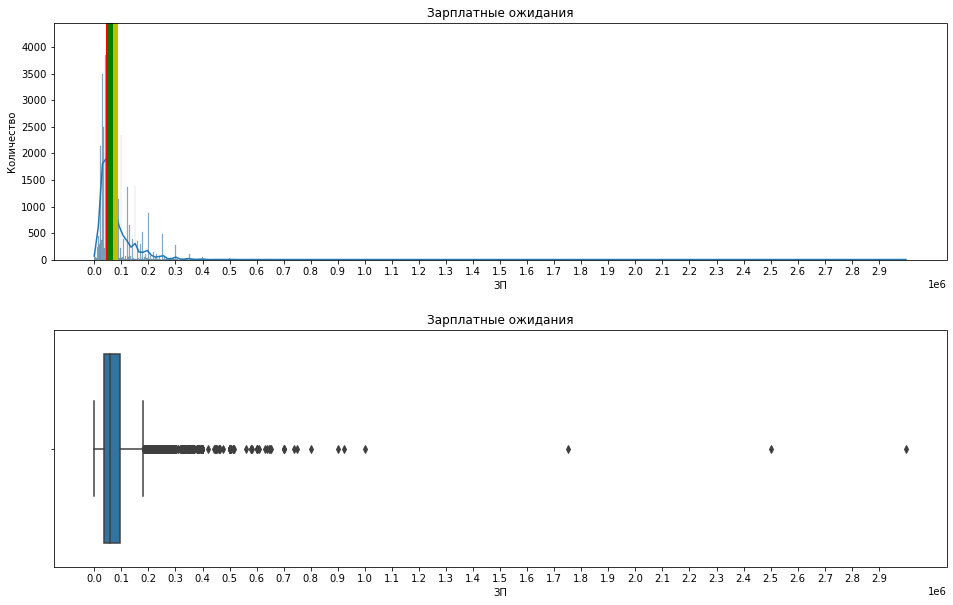

In [298]:
histobox(dfcleaned, 'ЗП', 'Зарплатные ожидания', 1, 3000000, 100000)

In [299]:
dfcleaned['ЗП'].describe()

count      44730.00
mean       75842.54
std        63768.83
min           18.00
25%        37550.32
50%        59038.00
75%        95000.00
max      3000000.00
Name: ЗП, dtype: float64

По своей форме распределение близко к логнормальному. Мы видим, что подавляющее большинство значений признака зарплаты  не превышают 200 тыс. рублей. 
При этом первый и третий квартили равны 37,5 и 95 тыс. рублей соответственно, медианное значение 59 тыс. 

Преобразуем зарплаты в десятичный логарифм и повторно построим гистограмму.

In [300]:
df['ЗП_ЛОГ'] = np.log10(dfcleaned['ЗП'])

In [301]:
df.query('ЗП<1E3').shape[0]

84

In [302]:
df.query('ЗП>1E6').shape[0]

5

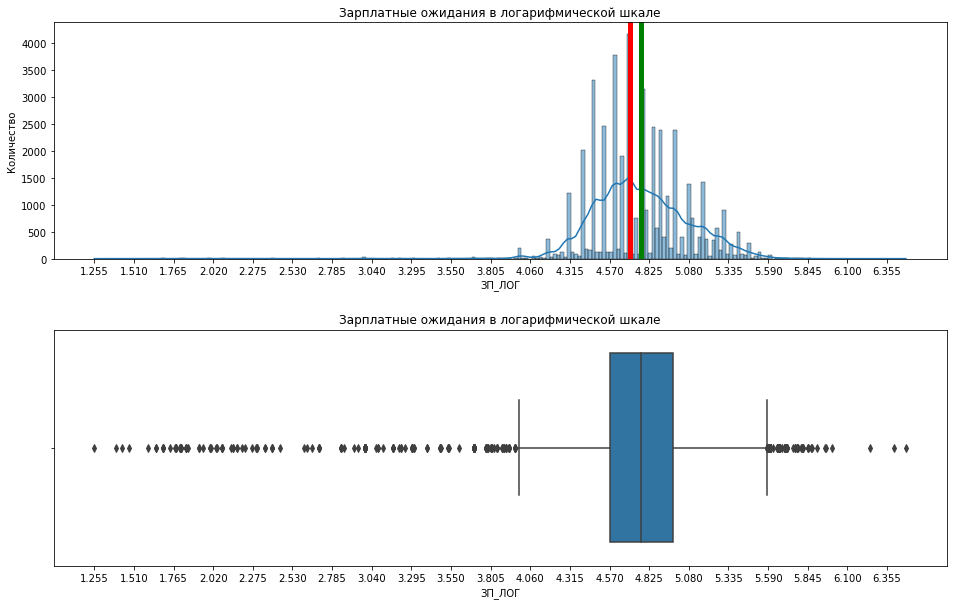

In [303]:
histobox(df, 'ЗП_ЛОГ', 'Зарплатные ожидания в логарифмической шкале', 0, 7, 0.255)

 На этой гистограмме мы видим выбросы в районе до 10^4 (10 тыс.) рублей и после 10^5.6 (398 тыс.) рублей. Определим количество позиций в каждой группе

In [304]:
lowsal = df.query('0<ЗП_ЛОГ<4')
lowsal.shape[0]

199

In [305]:
highsal = df[df['ЗП_ЛОГ'] > 5.6]
highsal.shape[0]

129

Отфильтруем основную часть распределения

In [306]:
medsal = df.query('4<=ЗП_ЛОГ<=5.6')

Построим гистограммы для каждой из подвыборок и посмотрим, прослеживаются ли ли какие-то закономерности в распределении зарплат.


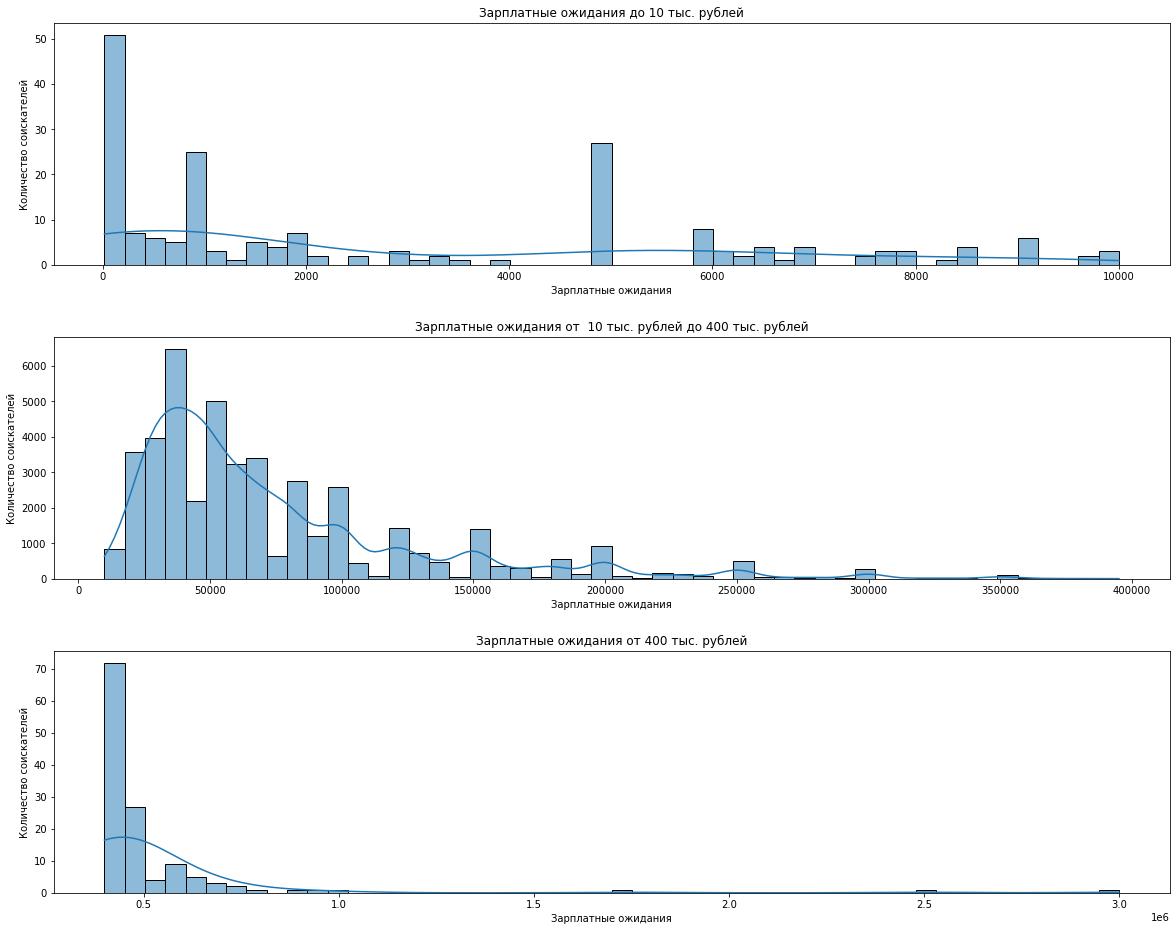

In [307]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=[20, 16])
histplot1 = sns.histplot(lowsal['ЗП'], kde=True, bins=50, ax=ax[0]).set_title(
    'Зарплатные ожидания до 10 тыс. рублей')
histplot2 = sns.histplot(medsal['ЗП'],  kde=True, bins=50, ax=ax[1]).set_title(
    'Зарплатные ожидания от  10 тыс. рублей до 400 тыс. рублей')
histplot3 = sns.histplot(highsal['ЗП'],  kde=True, bins=50, ax=ax[2]).set_title(
    'Зарплатные ожидания от 400 тыс. рублей')
[axis.set(xlabel='Зарплатные ожидания', ylabel='Количество соискателей')
 for axis in ax]
fig.subplots_adjust(hspace=0.3)

Начнём рассмотрение с записей с зарплатами до 10000 рублей. Данные распределены хаотично, посмотрим есть ли какая-то связь между этими значениями и уровнем
образования, стажем?

In [308]:
lowsal.groupby("Образование")[['ЗП', 'Всего Мес', 'Возраст']].median()

,ЗП,Всего Мес,Возраст
Образование,,,
Высшее образование,1082.83,127.00,33.00
Неоконченное высшее образование,1667.59,98.00,30.50
Среднее образование,7813.68,40.00,30.00
Среднее специальное образование,3434.44,101.00,28.00


In [309]:
lowsal.Образование.value_counts(normalize=True)*100

Высшее образование                 68.34
Среднее специальное образование    15.58
Неоконченное высшее образование    14.07
Среднее образование                 2.01
Name: Образование, dtype: float64

array([[<AxesSubplot:title={'center':'Высшее образование'}>,
        <AxesSubplot:title={'center':'Неоконченное высшее образование'}>],
       [<AxesSubplot:title={'center':'Среднее образование'}>,
        <AxesSubplot:title={'center':'Среднее специальное образование'}>]],
      dtype=object)

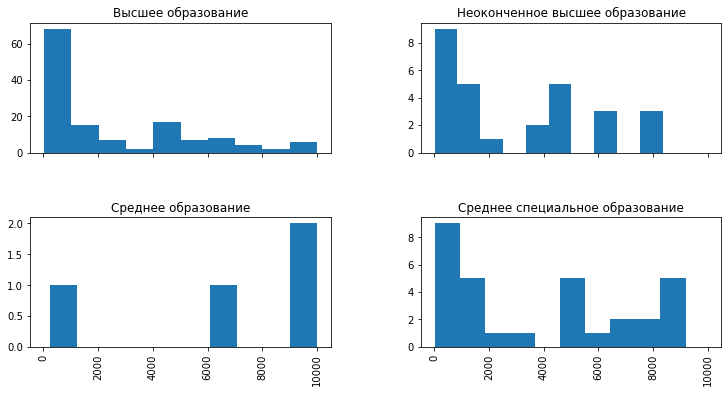

In [310]:
lowsal['ЗП'].hist(by=df['Образование'], bins=10, figsize=[12, 6], sharex=True)

Согласно данным, 68% соискатлей этой группы имеют высшее образование, а медианный стаж превышает 10 лет. Всё это позволяет им претендовать на должность с
окладом не менее 10 000 рублей, но медианная зарплата у них 1082 рубля в месяц и представляется нереалистичной. Более того, у  лиц со средним и средне-специальным образование медианная зарплата имеет более высокие значения, что очень странно. Медианный возраст всех этих соискателей находится в пределах 30-33 лет, и подобный уровень доходов не соответствует возрастным потребностям. 

Следовательно этой части датасета мы имеем заведомо недостоверные данные, либо ищется не работа а подработка. Последнее предположение косвенно подтверждается в таблице ниже, из которой мы видим что 70% кандидатов готовы к частичной занятости. При этом в основной группе соискателей ситуация прямо противоположная, а среди высокооплачиваемых к частичной занятости готов только каждый пятый. 

Ещё одним источником ошибки может являться указание зарплаты не в рублях а в тысячах рублей. Для проверки этого предположения следуеет изучить профили соискателей (пока остаётся за рамками проекта) 

In [311]:
lowsal.groupby('частичная занятость').ЗП.count().transform(lambda x: x/x.sum())

частичная занятость
False    0.31
True     0.69
Name: ЗП, dtype: float64

In [98]:
medsal.groupby('частичная занятость').ЗП.count().transform(lambda x: x/x.sum())

частичная занятость
False    0.71
True     0.29
Name: ЗП, dtype: float64

In [99]:
highsal.groupby('частичная занятость').ЗП.count(
).transform(lambda x: x/x.sum())

частичная занятость
False    0.77
True     0.23
Name: ЗП, dtype: float64

Учитывая всё вышесказанное, целесообразно исключить из датасета записи с зарплатными ожиданиями 10000 рублей. 

Теперь рассмотрим часть датасета с высокими окладами

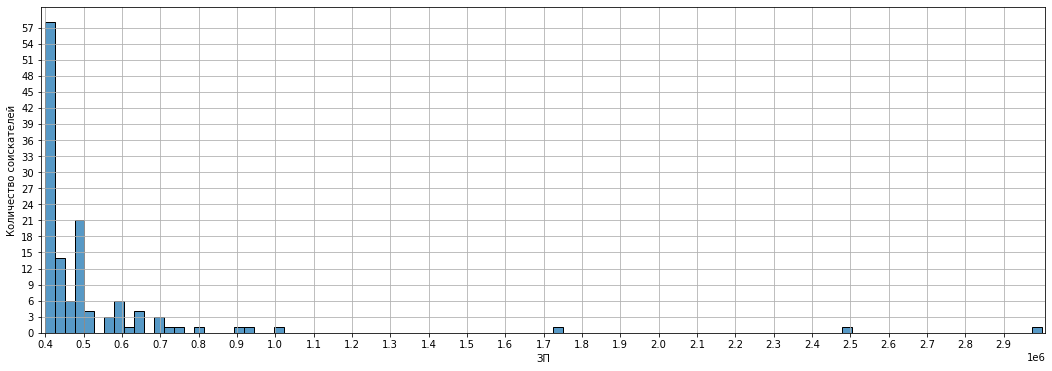

In [100]:
f, ax = plt.subplots(figsize=(18, 6))
ax.set_xticks(range(999, 3000000, 100000))
ax.set_yticks(range(0, 60, 3))
ax.set(xlim=[390000, 3010000])
ax.set(ylabel="Количество соискателей")
sns.histplot(data=highsal['ЗП'], bins=100).grid(True)

На гистограмме мы видим после 700 тыс рублей всего лишь 9 уникальных значений. Рассмотрим их

In [101]:
highsal[highsal['ЗП'] > 700000]

,ЗП,Ищет работу на должность:,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто,Образование,пол,...,полная занятость,проектная работа,стажировка,частичная занятость,вахтовый метод,гибкий график,полный день,сменный график,удаленная работа,ЗП_ЛОГ
12725,800000.00,Директор ИТ | Операционный Директор,9 лет 6 месяцев Январь 2013 — по настоящее время 6 лет 5 месяцев ...,Индивидуальное предпринимательство / частная практика / фриланс,"Веб программист, руководитель проекта",Высшее образование 2008 Российско-Армянский Государственный Универ...,2019-07-05,Не указано,Высшее образование,Мужчина,...,True,False,False,False,False,False,True,False,False,5.90
13337,736653.50,"Руководитель проекта, направления, дирекции","28 лет 8 месяцев Руководитель проекта, направления, дирекции 11 0...",Российский университет транспорта (МИИТ),Доцент,Высшее образование (Кандидат наук) 1998 Московский государственный...,2018-09-10,Не указано,Высшее образование,Мужчина,...,True,False,False,False,False,False,True,False,False,5.87
15836,900000.00,"Программист-разработчик 1C, PHP, 1C-Bitrix, C++, Delphi, JAVA, Vis...",13 лет 8 месяцев Март 2012 — по настоящее время 7 лет 3 месяца ОО...,"ООО ""ИНТЕР РАО ФИНАНС""",Топ-Менеджер по автоматизации закупок,"Высшее образование 2012 Государственный университет управления, М...",2019-07-05,Не указано,Высшее образование,Мужчина,...,True,True,False,True,True,True,True,True,True,5.95
28253,3000000.00,"Руководитель IT проектов, Роботизация, Автоматизация","23 года 4 месяца Руководитель IT проектов, Роботизация, Автоматиз...",HAMSTER ROBOTICS,Заместитель директора,Высшее образование 2019 Московский финансово-промышленный универс...,2019-04-27,Имеется собственный автомобиль,Высшее образование,Мужчина,...,True,True,False,True,True,True,True,False,True,6.48
28580,750000.00,Технический директор / Руководитель проектов,12 лет 10 месяцев Август 2017 — по настоящее время 1 год 10 месяц...,Смарт Стори,Технический директор,"Высшее образование 2007 ЭТИ СГТУ, Саратов ЭПУ, Роботы и робототех...",2019-04-13,Имеется собственный автомобиль,Высшее образование,Мужчина,...,True,False,False,False,False,False,True,False,False,5.88
32325,1000000.00,"Менеджер, Руководитель группы","3 года 6 месяцев Менеджер, Руководитель группы 1 000 000 руб. Инф...",ОТР 2000,Менеджер инцидентов,"Высшее образование (Бакалавр) 2017 Южный федеральный университет,...",2019-04-22,Не указано,Высшее образование,Женщина,...,True,False,False,False,False,False,True,False,True,6.00
33449,923983.00,Менеджер по продажам делегатского участия в международных саммитах,9 лет 3 месяца Март 2010 — по настоящее время 9 лет 3 месяца Инте...,Интернет провайдер,Менеджер проекта,Высшее образование (Бакалавр) 2016 КНИТУ филиал Кыргызская Республ...,2019-04-15,Имеется собственный автомобиль,Высшее образование,Женщина,...,True,True,False,True,False,False,True,False,False,5.97
41924,1750000.00,Project manager,3 года 3 месяца Project manager 1 750 000 руб. Информационные тех...,Тинькофф Банк,Технолог автоматизации бизнес-процессов,Неоконченное высшее образование 2020 Московский государственный у...,2019-04-22,Не указано,Неоконченное высшее образование,Мужчина,...,True,True,False,True,False,True,True,False,True,6.24
43134,2500000.00,Chief AI Officer,8 лет 1 месяц Chief AI Officer 2 500 000 руб. Информационные техн...,"Finnish Russian Univeristy Cooperation in Telecommunications, Hels...",Project Manager in Multimedia Technologies,Высшее образование (Кандидат наук) 2006 Postgraduate Study Moscow...,2018-10-25,Не указано,Высшее образование,Мужчина,...,True,False,False,False,False,False,True,False,False,6.40


Большинство соискателей относятся к топ-менеджменту и по всей видимости могут расчитывать на такой уровень оплаты труда. Однако, подозрения вызывают позиции № 32325( менеджер инцидентов с трудовым стажем 3 года) и № 41924 (Технолог автоматизации бизнес-процессов, тоже 3-х летний стаж). Либо мы имеем дело с носителями уникальных и потому высокооплачиваемых компетенций, либо их запросы завышены. Возможно эти позиции следует удалить из рассмотрения.

В целом данные по соискателям с запросами от 700 тыс хорошие, но возможно зависимости полученные на них будут отличаться от зависимостей характерных для основной выборки.

Посмотрим как выглядит статистика по зарплате для соискателей этой группы 

In [102]:
mainsal = highsal.query('7E5>=ЗП>=4E5')

In [103]:
mainsal.groupby('Образование')['ЗП'].agg(
    ['min', 'median', pd.Series.mode, 'max', 'std', 'count'])

,min,median,mode,max,std,count
Образование,,,,,,
Высшее образование,400000.00,450000.00,400000.00,700000.00,79523.90,110
Неоконченное высшее образование,400000.00,400000.00,400000.00,645171.00,88911.41,8
Среднее специальное образование,442038.85,442038.85,442038.85,442038.85,NaN,1


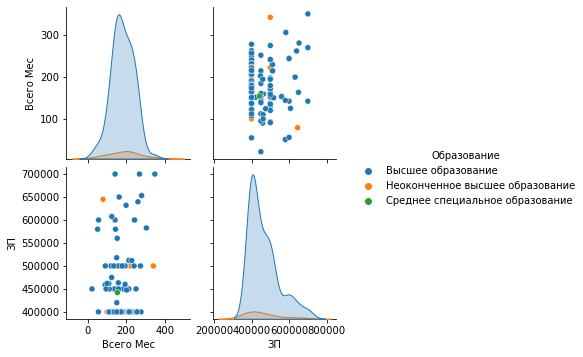

In [104]:
sns.pairplot(mainsal[['Всего Мес', 'ЗП', 'Образование']], hue='Образование')

Медианные зарплаты находятся в диапазоне 400-450 тыс. рублей и возрастают по мере повышения уровня образования.    Подавляющее большинство соискателей этой группы имеют высшее либо неоконченное высшее образование, лишь у одного соискателя оно средне специальное. 

Для соискателей с высшим и неоконченным высшим образованием минимальное значение зарплатных ожиданий одинаковое
и составляет 400 тыс рублей, но в случае неоконченного высшего оно же является и медианным, в то время как для соискателей 
с высшим образованием этот показатель возрастает до 450 тыс. рублей. Однако, модальное зачение для обеих групп высшего образования остаётся равным минимальным значениямю 400 тыс. р. Наблюдается положительная корреляция между уровнем образования и максимальным значением ожидаемой зарплаты.

Соискатель со средним специальным образованием является высококвалифицированным специалистом и запрашиваемый им оклад чуть ниже медианного для лиц с высшим образованием, и по всей видимости это справедивая оценка его знаний и навыков.

Наконец посмотрим статистику для основной части датасета (зарплаты в диапазоне 10 тыс.-400 тыс. рублей)

In [105]:
medsal = df.query('4<ЗП_ЛОГ<5.6')
salary_medians_stat = medsal.groupby('Образование')['ЗП'].agg(
    ['min', 'median', pd.Series.mode, 'max', 'std', 'count'])
salary_medians_stat.sort_values(by='max', ascending=True, inplace=True)

In [106]:
salary_medians_stat['count'] = salary_medians_stat['count'].transform(
    lambda x: round(x*100/x.sum(), 0))
salary_medians_stat.rename(columns={'count': '%'}, inplace=True)
salary_medians_stat['std'] = salary_medians_stat['std'].round(0)
salary_medians_stat

,min,median,mode,max,std,%
Образование,,,,,,
Среднее образование,10120.80,40000.00,40000.00,300000.00,41292.00,1.00
Среднее специальное образование,10120.80,40000.00,30000.00,350000.00,28087.00,13.00
Неоконченное высшее образование,11346.70,50000.00,50000.00,380000.00,43905.00,10.00
Высшее образование,10120.80,60000.00,50000.00,395000.00,59450.00,76.00


Мы отмечаем что для "средних" уровней образования совпадают медианные значения, в то время как для 'высших' совпадают моды. 
При этом существует прямая корреляция между уровнем образования и потолком запрашиваемой зарплаты. Самое низкое стандартное отклонение (28 тыс рублей) наблюдается для лиц со средним специальным образованием. У соискателей со средним и неоконченным высшим образованием стандартные отклонения примерно одинаковы и составляют 41 и 43 тыс рублей, в то время как для лиц имеющих высшее образование оно составляет 59 тыс рублей. По всей видимости это обусловлено более узкой вилкой зарплат для выпускников ССУЗ, ориентированных на относительно узкий круг специальностей. 


([<matplotlib.axis.YTick at 0x2251a6e0d60>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

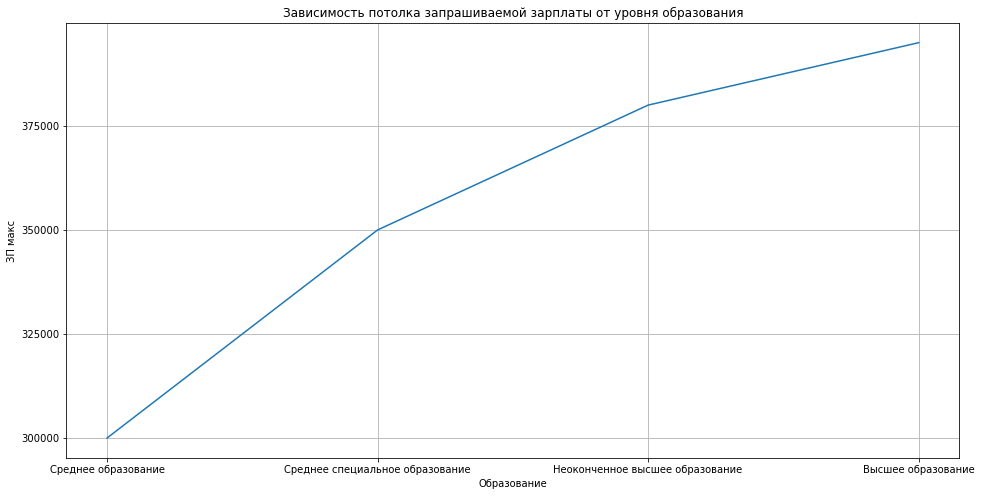

In [107]:
salary_max = salary_medians_stat['max'].reset_index()
salary_max.rename(columns={'max': 'ЗП макс'}, inplace=True)
plt.figure(figsize=(16, 8))
sns.lineplot(data=salary_max,
             x='Образование',
             y='ЗП макс').set(title='Зависимость потолка запрашиваемой зарплаты от уровня образования')
plt.grid(True)
plt.yticks(range(300000, 400000, 25000))

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [108]:
salary_medians_total_censored = df.query('ЗП<1E6').groupby('Образование')['ЗП'].agg(['min',
                                                                                     'median',
                                                                                    'max',
                                                                                     'count'])
salary_medians_total_censored['count'] = salary_medians_total_censored['count'].transform(
    lambda x: round(x*100/x.sum(), 0))
salary_medians_total_censored.rename(columns={'count': '%'}, inplace=True)

In [109]:
salary_medians_total_censored.reset_index(inplace=True)

Посмотрим на данные для полного датасета с цензурированием записей с ЗП>1 млн рублей.

Мы видим что:

1) минимальные значение как уже отмечалось заведомо некорректны и обозначают готовность к переговорам по зарплате
2) медианные значения ожидаемо совпадают с медианными значениями для диапазона medsal (10 тыс. - 400 тыс. рублей)
3) С ростом уровня образования увеличиваются и зарплатные ожидания

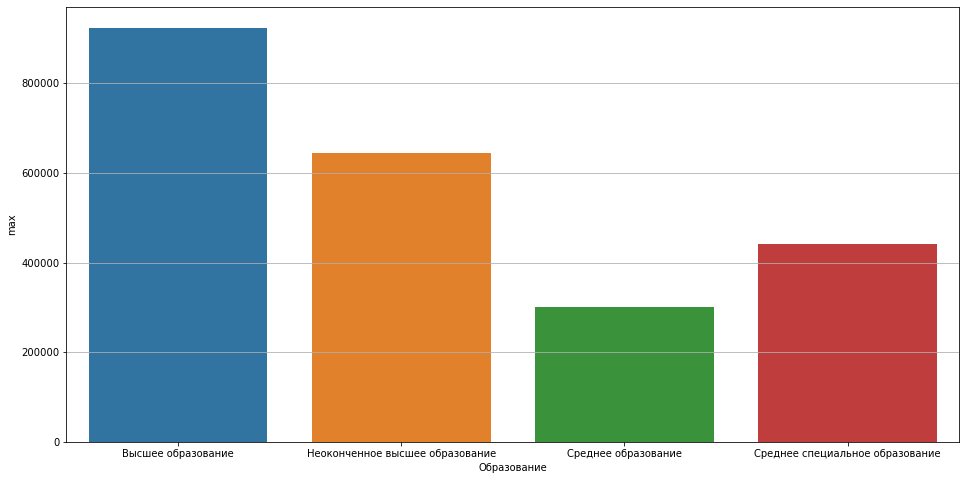

In [110]:
plt.figure(figsize=(16, 8))
sns.barplot(data=salary_medians_total_censored,
            x='Образование', y='max').yaxis.grid()

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [313]:
censored_df = df.query('ЗП<1E6')

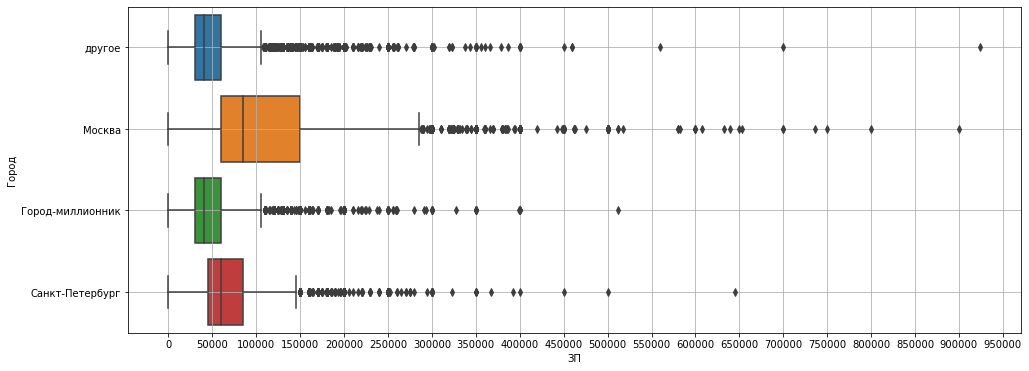

In [314]:
plt.figure(figsize=(16, 6))
a = sns.boxplot(data=censored_df, x='ЗП',  y='Город').grid(True)
plt.xticks(range(0, 1000000, 50000))
# x="day", y="total_bill", data=tips
a

In [315]:
city_sal_stat = censored_df.groupby('Город')['ЗП'].describe().round(0)

In [316]:
city_sal_stat

,count,mean,std,min,25%,50%,75%,max
Город,,,,,,,,
Город-миллионник,7332.00,51576.00,35334.00,1.00,30000.00,40000.00,60000.00,511682.00
Москва,16617.00,108597.00,72939.00,1.00,60000.00,85000.00,150000.00,900000.00
Санкт-Петербург,4937.00,72096.00,46256.00,1.00,44772.00,60000.00,85000.00,645171.00
другое,15852.00,53340.00,40124.00,1.00,30000.00,40000.00,60000.00,923983.00


Итак во всех городах имеются записи с зарплатой в 1 рубль, поэтому в качестве размаха мы можем принимать максимальное значение целевого параметра ЗП. Медианно ожидаемые зарплаты одинаковы для городов-миллионников и "других" городов, эти группы имеют практически идентичное распределение. При этом максимальное значение зарплаты для "других" городов превышает максимальные значения для Москвы, Санкт-Петербурга и городов-милионников. Посмотрим, у скольких соискателей из "других", нааблюдается зарплатное ожидание превосходящее максимальное значение для городов-миллионников. 

In [317]:
censored_df.groupby(censored_df.query('Город=="другое"')['ЗП'] >
                    censored_df.query('Город=="Город-миллионник"')['ЗП'].max())['ЗП'].count()

ЗП
False    15849
True         3
Name: ЗП, dtype: int64

Таких записей оказалось всего три

In [318]:
other_high_sal = censored_df.query('Город=="другое"')[(censored_df.query('Город=="другое"')['ЗП'] >
                                                      censored_df.query('Город=="Город-миллионник"')['ЗП'].max())]

Запрашиваем информацию по этим записям в датасете

In [319]:
dfraw.iloc[other_high_sal.index]

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
11781,"Мужчина , 57 лет , родился 19 июля 1961",700000 руб.,начальник отдела,"Южно-Сахалинск , готов к переезду , готов к командировкам",полная занятость,полный день,Опыт работы 29 лет 1 месяц Сентябрь 1987 — Сентябрь 2016 29 лет ...,Сахалинской области,руководитель отдела внедрения информационных систем Управления,Высшее образование 2006 Дальневосточный юридический институт Юрисп...,14.05.2019 07:35,Имеется собственный автомобиль
30193,"Мужчина , 33 года , родился 15 июня 1985",60000 KGS,Руководитель проектов,"Бишкек , готов к переезду (Кыргызстан, Россия, Казахстан) , готов ...",полная занятость,полный день,Опыт работы 12 лет 9 месяцев Февраль 2018 — по настоящее время 1 ...,"Beeline, TM",Старший менеджер по управлению программами и проектами,Высшее образование 2013 Кыргызский Государственный Национальный Ун...,09.04.2019 12:45,Имеется собственный автомобиль
33449,"Женщина , 37 лет , родилась 2 октября 1981",100000 KGS,Менеджер по продажам делегатского участия в международных саммитах,"Бишкек , готова к переезду (Россия) , не готова к командировкам","частичная занятость, проектная работа, полная занятость",полный день,Опыт работы 9 лет 3 месяца Март 2010 — по настоящее время 9 лет 3...,Интернет провайдер,Менеджер проекта,Высшее образование (Бакалавр) 2016 КНИТУ филиал Кыргызская Республ...,15.04.2019 11:46,Имеется собственный автомобиль


Соискатель зарегистрированный под номером 11781 обладает высокой квалификацией, не исключено что благодаря уникальным компетенциям он может рассчитывать на запрошенный уровень компенсации. Две остальные позиции представлены соискателями из Кыргызстана опыт работы которых не подтверждает гипотезу об ожидаемых заработках от 511 тыс рублей. Мы снова имеем дело с неправильным указанием валюты, на этот раз похоже имелись в виду рубли,а указаны были киргизские сумы, в результате чего ожидаемая зарплата доходит до 800 тыс рублей. При делении на курс RUR/KGS мы получим правильное значение.

Таким образом, реальный потолок зарплат для "других" городов в диапазоне окладов до 1 млн рублей не превышает 700 тыс. р. Это значение выше потолка зарплат для Санкт-Петербурга, но ниже потолка для Москвы.

Работая с данными этой группы необходимо понимать, что в неё вошли не только все соискатели из населёные пункты России 
не являющиеся крупнейшими, но и соискатели из городов СНГ, а также соискатели из дальнего зарубежья. Поэтому не исключено завышение медианной зарплаты по данной категории соискателей не только из-за ошибок в указании валюты, но и смешения неоднородных выборок (города России и города западной Европы). Возможно происходит сглаживания эфекта завышение оценок зарплат для европейский стран за счёт занижения оценок зарплат у выходцев из стран бывшего СССР. И при изменении соотношения количества этих соискателей, возможно увеличение ошибки прогноза.

Для повышения точности прогноза, может потребоваться выделение соискателей стран из дальнего зарубежья в отдельный класс (возможно то же было целесообразно сделать и с претендентами из стран бывшего СССР). Однако, учитывая сходный характер распределения зарплат, и предполагая что колимчество иностранцев у нас невелико, мы в первом приближении можем предположить что с точки зрения зарплатных ожиданий соискатели из городов-миллионников похожи на соискателей из категории "другие".  В этом случае целесообразно объединение этих меток для снижения размерности переменной "Город".

ваши выводы здесь

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [321]:
bt_reloc_salary = df.pivot_table(
    index='командировки', columns='переезд', values='ЗП', aggfunc=np.median)
bt_reloc_salary

переезд,False,True
командировки,,
False,40000.00,50000.00
True,60000.00,65849.46


In [322]:
bt_reloc_salary.transform(lambda x: x/40000-1)*100

переезд,False,True
командировки,,
False,0.00,25.00
True,50.00,64.62


Text(0, 0.5, 'Медианнаяе зарплата')

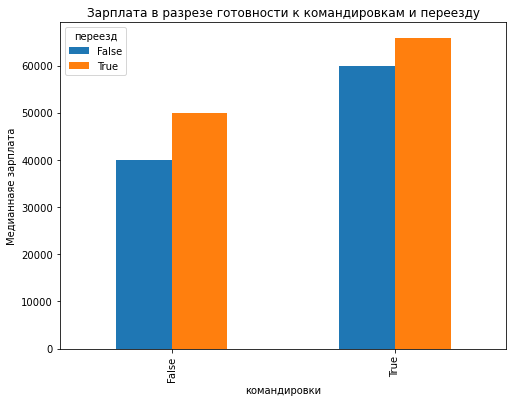

In [323]:
bt_reloc_salary.plot.bar(subplots=False,
                         title='Зарплата в разрезе готовности к командировкам и переезду',
                         figsize=(8, 6)).set_ylabel("Медианнаяе зарплата")

Минимальным уровнем зарплаты для групп является зарплата 40 тыс рублей у соискателей не готовым к переездам и командировкам. Максимальному медианному уровню соответствуют соискатели готовые и к командировкам и к переезду. При этом, если в качестве базового уровня взять ожидаемую зарплату для группы несогласных к переезду и командировкам, то согласие на переезд увеличивает зарплатное ожидание на 25%, а готовность к командировкам на 50%. Готовность же и к переезду и командировкам, увеличивает значение зарплатного ожидания на 64%.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

Построим тепловую карту.

Text(0.5, 1.0, 'Медианная ЗП в разрезе образования и возраста')

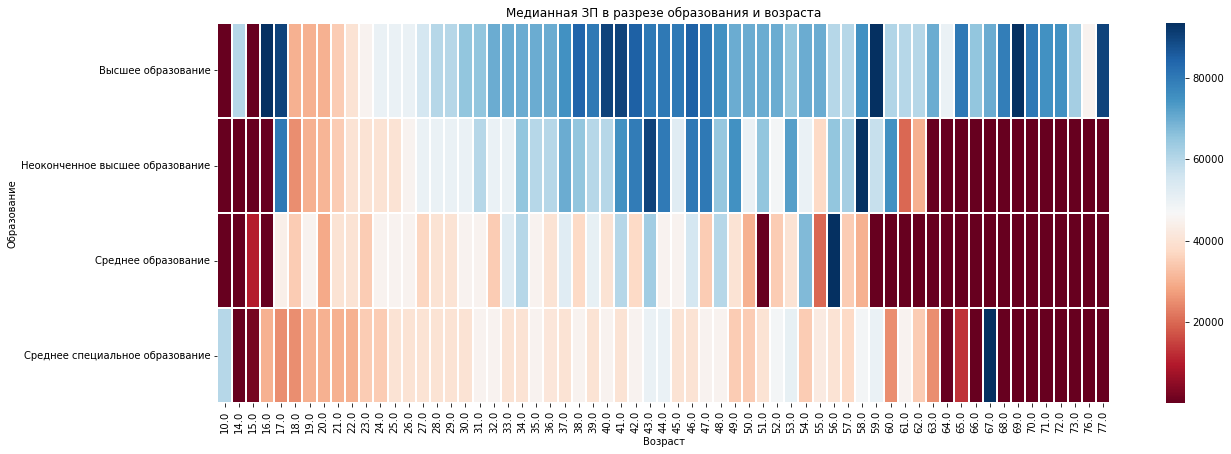

In [122]:
pivot = df.pivot_table(
    values='ЗП',
    index='Образование',
    columns='Возраст',
    aggfunc='median',
    fill_value=1)
fig, axes = plt.subplots(figsize=(20, 7))
heatmap = sns.heatmap(pivot, cmap='RdBu', linewidths=.25, robust=True)
heatmap.set_title('Медианная ЗП в разрезе образования и возраста')

из карты можно сделать следующие выводы:

1) Самые высокие уровни зарплаты ожидаемо наблюдаются у соискателей с высшим образованием. Для этой группы зарплатные ожидания плавно возрастают достигая пика в 40-41 год м далее начинают убывать. И с момента окончания института они всегда медианно претендуют на зарплаты от 50 тыс рублей. Это ещё раз подтверждает неинформативность данных со значениями заработной платы до 10 тыс. рублей. При этом, в группе встречаются соискатели с возрастом до 77 лет.  
2) Соискатели с незаконченным высшим образованием по выходу на уровень доходов в 50 тысяч в сравнении с выпускниками ВУЗ опаздывают на 3-4 года. При этом, пика зарплат они достигают в 43 года, после чего происходит снижение. и в 62 года они претендуют на такую же зарплату как и 18-тилетние соискатели этой группы. Судя по всему после 62-х лет эти соискатели исчезают с рынка труда.

3) Соискатели со средним специальным образованием имеют ещё более низкие зарплатные ожидания. Их ожидания достигаю 50 тыс рублей только в 30 лет. Далее наблюдаются колебания ожидаемой зарплаты с о всплесками в 43-44 года, 52-53 года и 58-59 лет. После этого показатель снижается, в 67 лет наблюдается всплеск (скорее всего единичный), после чего данная группа также покидает рынок труда.

4) Как не парадоксально, соискатели со средним образовванием начинают расчитывать на ЗП 50 тыс сразу по окончании школы. Для них наблюдается несколько пиков в 33-34 года, 41 и 43 года также в 54 года. В 56 лет наблюдаем яркий всплеск с окладом выше 80 тыс, но уже в 59 лет эта группа исчезает с рынка труда.

Говоря о возрасте ухода с рынка труда, мы должны учесть, что некоторые соискатели предпочитают устраиваться с использованием социальных связей и не обращаются в рекрутеринговые компании.

In [324]:
df.groupby("Образование")['Возраст'].max()

Образование
Высшее образование                 77.00
Неоконченное высшее образование    62.00
Среднее образование                58.00
Среднее специальное образование    67.00
Name: Возраст, dtype: float64

ваши выводы здесь

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

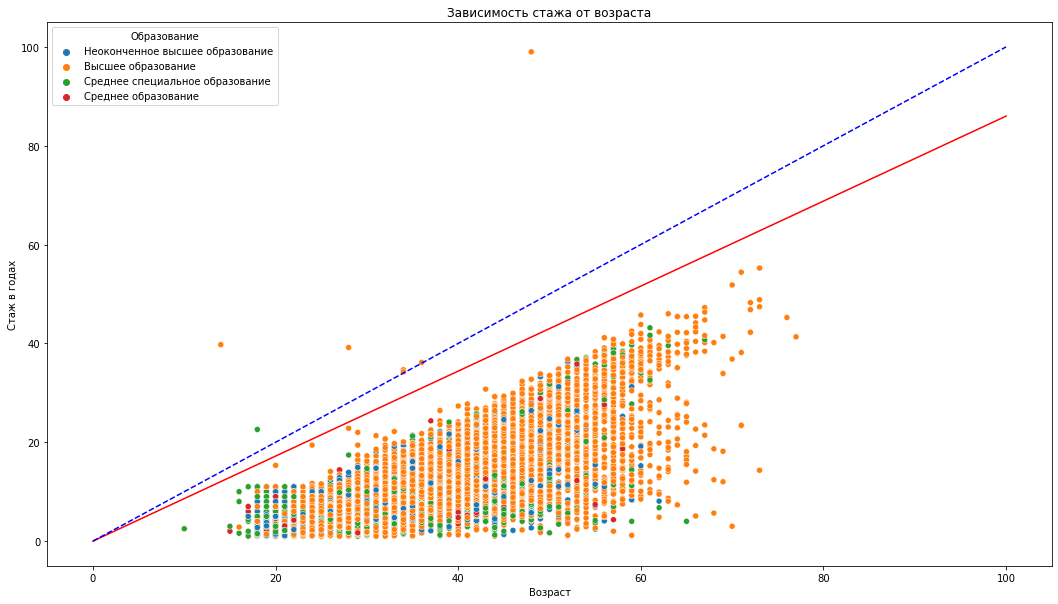

In [325]:
df['Стаж в годах'] = df['Всего Мес']/12
plt.figure(figsize=(18, 10))
# plt.xlim=(10, 80)
plt.xlim = (0, 100)
sns.scatterplot(data=df, x='Возраст', y='Стаж в годах',
                hue='Образование').set_title('Зависимость стажа от возраста')
plt.plot([0, 100], [0, 86], color='r')
plt.plot([0, 100], [0, 100], linestyle='dashed', color='b')

Максимальный стаж ограничен 86 годами иcходя из минимального возраста трудоустройства подростков не являющихся актёрами или спортсменами равного 14-ти. Согласно графику у нас имеется 7 аномальных наблюдений и 3 наблюдения на границе.

In [326]:
df[df['Стаж в годах']/df['Возраст'] >= 0.86]

,ЗП,Ищет работу на должность:,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто,Образование,пол,...,проектная работа,стажировка,частичная занятость,вахтовый метод,гибкий график,полный день,сменный график,удаленная работа,ЗП_ЛОГ,Стаж в годах
4535,15000.00,Технический специалист,22 года 7 месяцев Январь 1996 — Июль 2018 22 года 7 месяцев а а ...,а,а,Среднее специальное образование 2020 Чебоксарский Маштехникум Прог...,2019-11-04,Не указано,Среднее специальное образование,Женщина,...,True,False,True,False,False,False,True,True,4.18,22.58
19351,20000.00,Специалист (Junior-программист),39 лет 2 месяца Специалист (Junior-программист) 20 000 руб. Инфор...,"Русский свет, ООО",Электрик,"Высшее образование 2012 АГУ Экономический, Управление на предприят...",2019-04-26,Не указано,Высшее образование,Мужчина,...,False,False,False,False,False,True,False,False,4.30,39.17
19872,60740.50,Аналитик,"34 года 8 месяцев Аналитик 25 000 грн. Информационные технологии,...",Kyivstar,Фахівець з опису бізнес процесів,Высшее образование 2007 Черкаський національний університет ім. Бо...,2019-04-26,Не указано,Высшее образование,Мужчина,...,False,False,False,False,False,True,False,False,4.78,34.67
26477,80000.00,Менеджер IT-проектов,34 года 3 месяца Октябрь 2017 — по настоящее время 1 год 8 месяце...,"М©й IT'M (""Информационные Технологии' Менеджмент"")",Основатель,"Высшее образование 2013 СГАУ имени ак, С.П. Королева (ниу) Экономи...",2019-08-04,Не указано,Высшее образование,Мужчина,...,True,True,True,True,True,True,True,True,4.90,34.25
29098,60000.00,Ведущий инженер-программист,39 лет 9 месяцев Ведущий инженер-программист 60 000 руб. Информац...,"КБ Аметист, Концерн АГАТ",Ведущий инженер-программист,Высшее образование 1979 Московское высшее техническое училище им....,2019-04-26,Не указано,Высшее образование,Мужчина,...,False,False,False,False,False,True,False,False,4.78,39.75
40015,60000.00,Системный администратор Windows,99 лет Июнь 1920 — по настоящее время 99 лет АО ТК Горизонт Росто...,АО ТК Горизонт,Начальник отдела информационных технологий,"Высшее образование 2014 Московский технологический институт, Моск...",2019-04-16,Не указано,Высшее образование,Мужчина,...,False,False,True,True,True,True,False,True,4.78,99.00
43451,200000.00,Руководитель отдела разработки,36 лет 2 месяца Руководитель отдела разработки 200 000 руб. Инфор...,ЛАНИТ,Руководитель проекта,Высшее образование 2005 Московский Институт Электронной Техники Эл...,2018-08-17,Не указано,Высшее образование,Мужчина,...,False,False,False,False,False,True,False,False,5.30,36.17


**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


ваши выводы здесь

Из типа занятости и графика работ мы  с помощью горячего кодирования получили несколько бинарных переменных. Посмотрим, 
имеется ли связь между устраивающими соискателя типами занятости и графиком работы 

In [331]:
occupation = ['волонтерство', 'полная занятость',
              'проектная работа', 'стажировка', 'частичная занятость']
schedule = ['вахтовый метод', 'гибкий график',
            'полный день', 'сменный график', 'удаленная работа']

# Создаём словарь, в котором ключами будут тип и график, а значением- коэффициент корреляции Спирмена
mydict = {}
for i in occupation:
    for j in schedule:
        mydict[(i, j)] = df[i].corr(df[j], method='spearman').round(1)


# Создаём словарь, в котором ключами будут тип и график, а значением- коэффициент корреляции Спирмена,
# превращаем словарь в датафрейм
work_cond_corr = pd.DataFrame(mydict.items(), columns=['column1', 'column2'])

<AxesSubplot:xlabel='График', ylabel='Вид Занятости'>

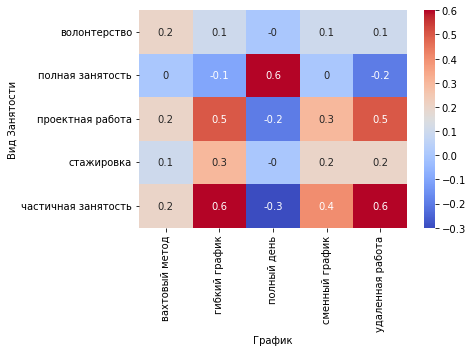

In [332]:
# Преобразуем список в строку и разделяем на 2 столбца с типами и видами,
work_conds = pd.DataFrame(
    work_cond_corr.column1.apply(lambda x: list(x)).tolist())
work_conds.columns = ["Вид Занятости", "График"]

# добавляем к датафрейму вектор коэффициентов корреляции
work_conds['corrs'] = mydict.values()

# Превращаем датафрейм в сводную таблицу и на её основе строим тепловую диаграмму.

work_conds_pivot = pd.pivot(
    data=work_conds, index='Вид Занятости', columns='График', values='corrs')
sns.heatmap(work_conds_pivot, cmap='coolwarm', annot=True)

Как мы видим:

1) Кандидаты предпочитающих гибкий график, сменный график либо удалённую работу зачастую согласны и на частичную занятость.
    
2) Желающие работать полный день, как правило против частичной занятости (отрицательная корреляция).
    
3) Согласные на частичную занятость редко соглашаются на работу вахтовым методом .
    
4) Согласие на стажировку слабо положительно коррелируется с гибким, сменным графиками и удалёнкой, с согласием на полный день практически нет корреляции.
    
5) проектная работа имеет среднюю степень корреляции с готовностью к проектной работе и удалёнке, с "полным днём", наблюдается отрицательная корреляция. 
    
6) Полная занятость ожидаемо высоко коррелирует с полным днём, а вот работа по гибкому графику и удалённая работа этих кандидатов скорее не устраивает.

7) Волонтёрство слабо коррелирует с различными графиками, с полным днём корреляция близка к нулю.


Теперь посмотрим как связаны предпочтения по виду занятости и графику работы с медианными зарплатами

In [333]:
work_conds

,Вид Занятости,График,corrs
0,волонтерство,вахтовый метод,0.20
1,волонтерство,гибкий график,0.10
2,волонтерство,полный день,-0.00
3,волонтерство,сменный график,0.10
4,волонтерство,удаленная работа,0.10
5,полная занятость,вахтовый метод,0.00
6,полная занятость,гибкий график,-0.10
7,полная занятость,полный день,0.60
8,полная занятость,сменный график,0.00
9,полная занятость,удаленная работа,-0.20


In [334]:
# Создаём аналогичный датафрейм из work_conds и по ключам Вид-График создаём серию медианных зарплат

work_cond_sal = work_conds[["Вид Занятости", "График"]].copy()

sallist = []
for i, j in mydict.keys():
    sallist.append(df[(df[i] == True) & (df[j] == True)]['ЗП'].median())
work_cond_sal['Медианная ЗП'] = sallist

# Для удобства аннотции на тепловой карте, выражаем зарплату в 10 тысяч
work_cond_sal['Медианная ЗП'] = work_cond_sal['Медианная ЗП'].transform(
    lambda x: x.round(-3)/1000)

In [394]:
work_conds_sal_pivot = pd.pivot(
    data=work_cond_sal, index='Вид Занятости', columns='График', values='Медианная ЗП')

<AxesSubplot:xlabel='График', ylabel='Вид Занятости'>

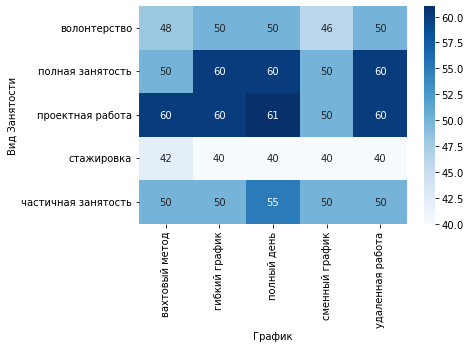

In [395]:
sns.heatmap(work_conds_sal_pivot, cmap='Blues', annot=True)

Из диаграммы мы можем сделать следующие выводы:

1) Стажировка: Зарплатные ожидания у соискателей допускающих стажировку практически не зависит от графика работы(кроме вахтового метода), составляют 40 тыс. рублей и являются самыми низкими среди видов занятости. Для удобства дальнейших сопоставлений, будем считать 40 тыс рублей базовым уровнем. У согласный на вахтовый метод зарплатные ожидания выше на 5%.
2) Волонтёрство: Зарплатные ожидания у соискателей согласных на волонтёрство и при этом согласных на удалёнку, гибкий гафик или полный день, выше базового уровня на 25%, самый низкий показатель в группе- для согласных на сменный график работы (15%). Для вахтового метода увеличение составляет 20%.
3) Частичная занятость: здесть как и у предыдущей группы ожидания по зарплате выше на 25% для всех графиков работы кроме полного рабочего дня. Указавшие его соискатели ожидают оклад на 5 тыс. р больше (выше на 37,5% от базового уровня).
4) Полная занятость: у согласных на вахтовый метод и/или на сменный график медианная зарплата равна моде зарплаты предыдущей группы по графикам. Для гибкого, полного и удалённого графика работы, зарплатные ожидания выше базового уровня на 50%.
5) Проектная работа: здесь почти у всех ожидание составляет или превышает значение 60 тыс рублей. Однако, до этого значения не дотягивает ожидание у согласных на проектную работу и при этом готовых на сменный график. У этих соискателей медианное значение зарплаты составляет 50 тыс. рублей. 
6) Виды графиков удалённая работа и гибкий график видут себя очень похоже в пространстве Вид Занятости-Зарплатное ожидание. Возможно имеет смысл объединить их в единый признак "гибкий график или удалённо"

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [336]:
duplicates = dfraw[dfraw.duplicated(subset=dfraw.columns)]
dfraw = dfraw.drop_duplicates()
print(duplicates.shape[0])

153


В исходном файле у нас 153 дубликата, посмотрим сколько дубликатов мы имеем в обработанном файле

In [397]:
duplicates_ = df[df.duplicated(subset=df.columns)]
# df = df.drop_duplicates()
# print(duplicates_.shape[0])
# aa=set(dfraw.iloc[7269])
# bb=set(dfraw.iloc[37481])
# print(set(aa)^ set(bb))
# print(set(a)^ set(b))
# dfraw.iloc[dfraw.index.isin([41997, 7269, 37481, 15335])]
# df.iloc[7269]['Обновление резюме']

Итак у нас 155 дубликатов (должно быть 161, причина несовпадения не выявлена). Два дополнительных дубликата образуются при обнулении секунд при преобразовании признака "Время обновления"

Удаляем найденные дубликаты

In [398]:
df = df.drop_duplicates()
df.shape

(44589, 29)

In [399]:
# ваш код здесь

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [400]:
df.isna().sum()[df.isna().sum() > 0]

Опыт работы                        166
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
starting_age                       168
Лет                                168
Всего Мес                          168
Стаж в годах                       168
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [401]:
df = df.dropna(subset=['Последнее/нынешнее место работы',
                       'Последняя/нынешняя должность',
                       ])

In [402]:
df.shape[0]

44587

In [403]:
df.isna().sum()[df.isna().sum() > 0]

Опыт работы     166
starting_age    168
Лет             168
Всего Мес       168
Стаж в годах    168
dtype: int64

Предлагается заменять отсутствующие значения медианными значениями, однако более правильной выглядит заполнение пропусков медианными значениями Стажа для соответствующего возраста.

In [404]:
age_medians = df.groupby(['Возраст'])['Всего Мес'].median().reset_index()

Построим график изменения медианы стажа с возрастом для определения интервала применимости подхода

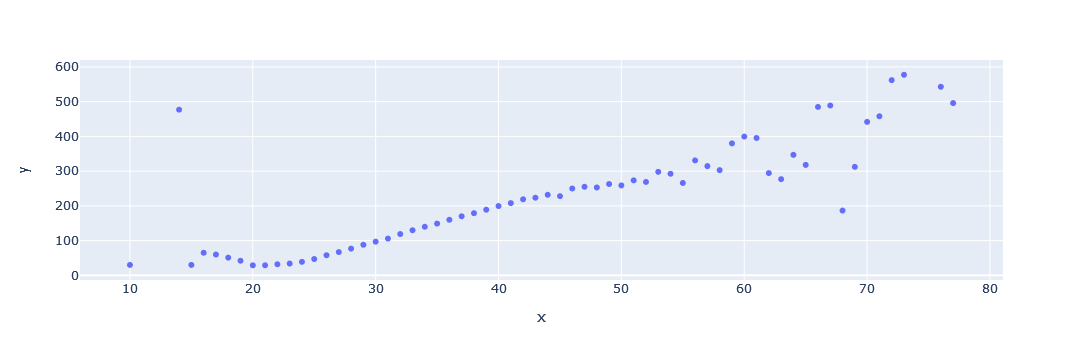

In [405]:
fig = px.scatter(x=age_medians['Возраст'],
                 y=age_medians['Всего Мес'])
fig.show()

До 16-ти лет можно считать стаж равным 30 мес. В диапазоне с 16 до 20 стаж линейно снижается, а после этого практически линейно возрастает до 54 лет, после чего начинается период гетероскедастичности (по всей видимости ввиду снижения количества наблюдений и отклонения от нормального распределения). Таким образов в диапазоне от с 16 до 54 лет мы имеем предсказуемые изменения медианного стажа, который можно исапользовать для заполнения пропусков в соответствии с возрастом. Пока же мы будем заменять стаж медианным значением выборки (102 месяца)

In [406]:
df['Всего Мес'] = df['Всего Мес'].fillna(np.median(df['Всего Мес']))

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [407]:
df = df.query('1E3<=ЗП<=1E6')
df.shape[0]

44498

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [409]:
df = df[df['starting_age'] > 0]
df.shape[0]

44325

In [410]:
df['Всего Мес'].mean()

116.8136717428088

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [340]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [341]:
outliers, cleaned = outliers_z_score_mod(
    df, 'Возраст', left=3, right=4, log_scale=True)

In [342]:
len(outliers)

4

Text(0.5, 1.0, 'Возраст')

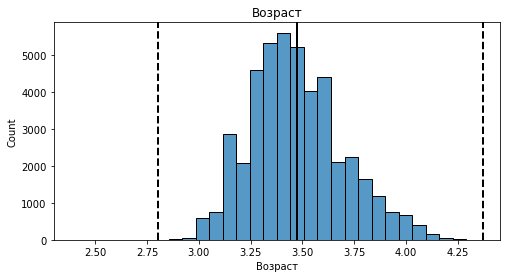

In [344]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(df['Возраст'] + 1)
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean() + 4 * log_age.std(),
                 color='k', ls='--', lw=2)
histplot.axvline(log_age.mean() - 3 * log_age.std(),
                 color='k', ls='--', lw=2)
histplot.set_title('Возраст')

In [201]:
outliers

,ЗП,Ищет работу на должность:,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто,Образование,пол,...,полная занятость,проектная работа,стажировка,частичная занятость,вахтовый метод,гибкий график,полный день,сменный график,удаленная работа,ЗП_ЛОГ
29098,60000.00,Ведущий инженер-программист,39 лет 9 месяцев Ведущий инженер-программист 60 000 руб. Информац...,"КБ Аметист, Концерн АГАТ",Ведущий инженер-программист,Высшее образование 1979 Московское высшее техническое училище им....,2019-04-26,Не указано,Высшее образование,Мужчина,...,True,False,False,False,False,False,True,False,False,4.78
31137,10000.00,Менеджер по работе с клиентами,"2 месяца Июнь 2018 — Июль 2018 2 месяца ООО ""ФёрстКэшКомпани"" Ме...","ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,Среднее образование 2021 ГБОУ Гимназия №528,2019-06-04,Не указано,Среднее образование,Мужчина,...,False,False,False,True,False,True,False,True,True,4.00
32950,2000.00,Тестировщик игр,3 месяца Март 2019 — по настоящее время 3 месяца OOO ЖМЫХ Тестиро...,OOO ЖМЫХ,Тестировщик ПО,"Среднее специальное образование 2020 Жмых Жмых, Игроман",2019-09-04,Не указано,Среднее специальное образование,Мужчина,...,True,False,False,False,False,False,True,False,False,3.30
33654,60000.00,Frontend-разработчик,2 года 6 месяцев Февраль 2019 — по настоящее время 4 месяца Freel...,Freelance,Frontend-разработчик,Среднее специальное образование 2015 Санкт-Петербургский государс...,2019-04-19,Не указано,Среднее специальное образование,Мужчина,...,True,True,True,True,False,True,True,False,True,4.78


In [359]:
df[df['Возраст'] > 75].iloc[:, 0:12]

,ЗП,Ищет работу на должность:,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто,Образование,пол,starting_age,Возраст
5597,90000.00,"Специалист или Преподаватель по разработке баз данных, программи...",41 год 4 месяца Специалист или Преподаватель по разработке баз да...,МАДК им. А А Николаева,"Разработчик, преподаватель",Высшее образование 1971 военная инженерная академия им. Ф Э Дзержи...,2018-10-31,Не указано,Высшее образование,Мужчина,35.67,77.00
15419,45000.00,Методолог,"45 лет 3 месяца Методолог 45 000 руб. Информационные технологии, ...","РУТ (МИИТ), институт управления и информационных технологий, УНЦ ""...",Начальник отдела технологий IBM,Высшее образование (Кандидат наук) 1972 Аспирантура МИИТа (ныне РУ...,2019-04-26,Не указано,Высшее образование,Мужчина,30.75,76.00


**В завершение:**

Комментарии по проекту:
1) Очень интересные данные, спасибо за возможность поработать над ними

2) По ряду показателей ответы разошлись с контрольными, буду благодарен за помощь с выяснением причин

3) Считаю выбросными зарплаты до 10 тыс и после 3 млн рублей. 

4) Условно можно выделить следующие поддиапазоны зарплат:

    a) 10-400 тыс. р. Основной диапазон
    
    б) 400-700 тыс р. Высокий диапазон
    
    в) 700 тыс р.-3 млн р. Элитный диапазон. Здесь мало данных, а разброс зарплат может быть значительным.
    
5) Некоторые молодые соискатели указывают стаж, исходя из которого они начали трудовую деятельность в 8-10 лет. Легальной возможности трудоустройства у детей этого возраста нет, если они не артисты и не спортсмены. В основном это представители IT-индустрии, которые отсчитывают стаж от даты разработки своего первого коммерческого продукта (или услуги), но трудовой такой стаж не подтверждается. Поэтому для необходимо цензурирование данных по возрасту (14+). Касаясь возрастных кандидатов 65+, это также в основном программисты.

6) По моему мнению, для данного вида датасета предпочтительно ручное удаление выбросов возраста и зарплаты. 

7) Возможно имеет смысл выделить в признаке Город ещё 2 значения: ближнее и дальнее зарубежье

8) Имеется стойкое ощущение, что необходимо введение дополнительных признаков отражающих сферу деятельности и профессиональную принадлежность соискателя, а также социальную страту. 

9) Пропуски в указании стажа на мой взгляд лучше устранять с учётом возраста соискателя. Для возрастных соискателей возможно имеет смысл использовать скользящее среднее.